## Import requirements

In [1]:
# requirements:

import numpy as np
import numpy as np
import matplotlib.pyplot as plt

## The required class

1. BanditMachine
2. EpsilonGreedy
3. UCB


In [2]:
# class BanditMachine:

class BanditMachine:
    def __init__(self, n_arms):
        self.n_arms = n_arms  # number of arms
        
        self.sigma = 2  # reward distribution's standard deviation
        self.miu_list = np.random.normal(0, self.sigma, n_arms)  # initialize the mean of each arm's reward
        self.counts = np.zeros(n_arms, dtype=int)  # record the number of each arm being pulled
        self.values = np.zeros(n_arms)  # record the estimated value of each arm
        
    def update(self, arm, reward):
        """
        更新被拉动臂的信息
        :param arm: int, 臂的索引
        :param reward: float, 奖励
        """
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        self.values[arm] = ((n - 1) / n) * value + (1 / n) * reward # incremental update of the estimated value

    def play(self, arm):
        """
        拉动指定的臂
        :param arm: int, 臂的索引
        :return: float, 奖励
        """
        if arm < 0 or arm >= self.n_arms:
            raise ValueError("Arm index is out of range.")
        
        # generate the reward
        reward = np.random.normal(self.miu_list[arm], self.sigma)
        # update the arm's information
        self.update(arm, reward)
        return reward


In [3]:
# class EpsilonGreedy:

class EpsilonGreedy:
    def __init__(self, machines, epsilon):
        """
        :param machines: BanditMachine, 多臂赌博机的实例
        :param epsilon: float, 探索的概率
        """
        self.machines = machines
        self.epsilon = epsilon
        self.arms = machines.miu_list
        self.n_arms = len(self.arms)
        self.counts = np.zeros(self.n_arms, dtype=int)  # record the number of each arm being pulled
        self.values = np.zeros(self.n_arms, dtype=float)  # record the estimated value of each arm
        self.total_counts = 0  # record the total number of arms being pulled

    def select_arm(self):
        # if there are arms that have never been pulled, then pull them
        for arm in range(self.n_arms):
            if self.counts[arm] == 0:
                return arm
        
        # with probability epsilon, randomly select an arm, otherwise select the arm with the highest estimated value
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        # update the estimated value of the chosen arm
        self.total_counts += 1
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

    def play(self):
        # choose an arm and pull it
        chosen_arm = self.select_arm()
        reward = self.machines.play(chosen_arm)
        self.update(chosen_arm, reward)
        return chosen_arm, reward


In [4]:
class UCB:
    def __init__(self, machines, c):
        """
        :param arms: list, 每个元素是一个BanditArm对象
        :param c: float, 探索因子
        """
        self.machines = machines
        self.c = c 
        self.arms = machines.miu_list # the list of arms
        self.n_arms = len(self.arms) # 臂数
        self.counts = np.zeros(self.n_arms, dtype=int)  # record the number of each arm being pulled
        self.values = np.zeros(self.n_arms, dtype=float)  # record the estimated value of each arm
        self.total_counts = 0 # record the total number of arms being pulled

    def select_arm(self):
        # if there are arms that have never been pulled, then pull them
        for i in range(self.n_arms):
            if self.counts[i] == 0:
                return i
        
        
        # return the arm with the highest UCB value
        ucb_values = self.values + self.c * np.sqrt(np.log(self.total_counts) / (self.counts + 1))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        # update the estimated value of the chosen arm
        self.total_counts += 1
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

    def play(self):
        # choose an arm and pull it
        chosen_arm = self.select_arm()
        reward = self.machines.play(chosen_arm)
        self.update(chosen_arm, reward)
        return chosen_arm, reward


## Test bandit base

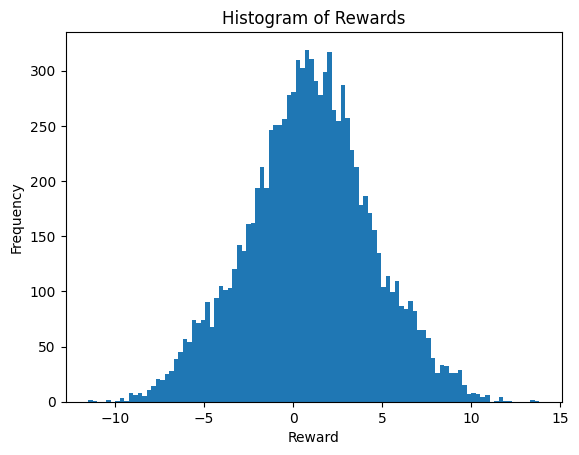

Average Reward: 0.9211602931367002


In [5]:
# initialize a bandit machine with 10 arms
arm = BanditMachine(10)

rewards = []
for arm_i in range(10):
    for _ in range(1000):
        reward = arm.play(arm_i)
        rewards.append(reward)

average_reward = np.mean(rewards)


plt.hist(rewards, bins=100)
plt.xlabel('Reward')
plt.ylabel('Frequency')
plt.title('Histogram of Rewards')
plt.show()

print("Average Reward:", average_reward)


## Test Epsilon Greedy

In [6]:
# initialize a bandit machine with 10 arms
bandits = BanditMachine(10)
for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  3.982186978696387
arm:  1 miu:  -1.389189180006807
arm:  2 miu:  1.3930950961333437
arm:  3 miu:  -0.045715174547086145
arm:  4 miu:  -1.0924603744549077
arm:  5 miu:  -3.9262875563343247
arm:  6 miu:  0.874518703973976
arm:  7 miu:  0.24486709446024593
arm:  8 miu:  0.2644996487902014
arm:  9 miu:  3.4198597447235843


In [7]:
bandits.miu_list = [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1]
# bandits.miu_list = [-1, 1]

for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  -1
arm:  1 miu:  -1
arm:  2 miu:  -1
arm:  3 miu:  -1
arm:  4 miu:  -1
arm:  5 miu:  -1
arm:  6 miu:  -1
arm:  7 miu:  -1
arm:  8 miu:  -1
arm:  9 miu:  1


chosen_arm:  0 reward:  -0.41469300466118175
chosen_arm:  1 reward:  -0.8097905616645886
chosen_arm:  2 reward:  -1.9773925326268251
chosen_arm:  3 reward:  0.7594868162738349
chosen_arm:  4 reward:  0.9772475180981051
chosen_arm:  5 reward:  -3.137325705216005
chosen_arm:  6 reward:  0.6734363494114852
chosen_arm:  7 reward:  -0.6112312673938001
chosen_arm:  8 reward:  1.0754587905724664
chosen_arm:  9 reward:  -0.43507201401110907
chosen_arm:  8 reward:  -1.1360492892324467
chosen_arm:  4 reward:  0.08684245258109469
chosen_arm:  3 reward:  1.3684001548585334
chosen_arm:  0 reward:  -1.813314965326064
chosen_arm:  3 reward:  -4.0682624105552225
chosen_arm:  6 reward:  1.1155734865971847
chosen_arm:  6 reward:  -0.4820188039502138
chosen_arm:  4 reward:  -1.997613271580751
chosen_arm:  6 reward:  -1.9014234095499272
chosen_arm:  8 reward:  -4.271676436825591
chosen_arm:  6 reward:  3.8399733083789114
chosen_arm:  6 reward:  -0.7013119284883034
chosen_arm:  6 reward:  -1.60812113993964

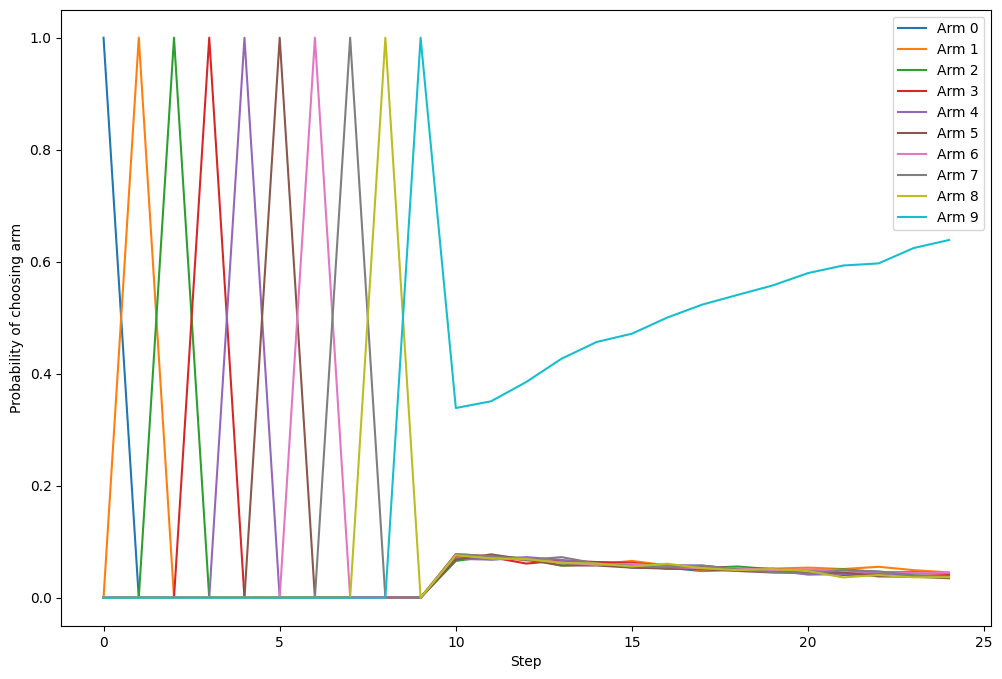

In [8]:
# initial Episilon-greedy agent
e = 0.1
e_greedy_bandits = EpsilonGreedy(bandits, e)

# play 25 times
for _ in range(25):
    chosen_arm, reward = e_greedy_bandits.play()
    print("chosen_arm: ", chosen_arm, "reward: ", reward)

e = 0.0
# e_greedy_bandits = EpsilonGreedy(bandits, e)

# initialize numbers of rounds
total_rounds = 4000

# initialize the number of steps
total_steps = 25

# record the number of times each arm is pulled at each step
arm_counts = np.zeros((total_steps, bandits.n_arms))

# run Epsilon-Greedy for multiple rounds
for _ in range(total_rounds):
    e_greedy_bandits = EpsilonGreedy(bandits, e)  # initialize the Epsilon-Greedy agent for each round
    for step in range(total_steps):
        chosen_arm, _ = e_greedy_bandits.play()
        arm_counts[step, chosen_arm] += 1

# transform the counts into probabilities
arm_probabilities = arm_counts / total_rounds

# output the probabilities of selecting each arm at the 11th step
step = 10  # the index of the step
print(f"Probabilities of selecting each arm at step {step + 1}:")
for arm in range(bandits.n_arms):
    print(f"Arm {arm}: {arm_probabilities[step, arm]}")

# draw the probabilities of selecting each arm at each step
plt.figure(figsize=(12, 8))
for arm in range(bandits.n_arms):
    plt.plot(arm_probabilities[:, arm], label=f'Arm {arm}')
plt.xlabel('Step')
plt.ylabel('Probability of choosing arm')
plt.legend()
plt.show()

## Test UCB

In [9]:
# initial bandit machine
bandits = BanditMachine(10)
for i in range(10):
    print("arm: ", i, "miu: ", bandits.miu_list[i])

arm:  0 miu:  0.9786659981398593
arm:  1 miu:  -0.2541467194168736
arm:  2 miu:  2.1504403178452454
arm:  3 miu:  0.27764733897717353
arm:  4 miu:  0.2059025669912182
arm:  5 miu:  -0.30863491102322255
arm:  6 miu:  -0.7783261751097312
arm:  7 miu:  3.6427395926619774
arm:  8 miu:  -2.504439582509486
arm:  9 miu:  4.5175863563089695


In [10]:
# initial UCB agent
c = 1.5
ucb_bandits = UCB(bandits, c)

# play 25 times using UCB
for _ in range(25):
    chosen_arm, reward = ucb_bandits.play()
    print("chosen_arm: ", chosen_arm, "reward: ", reward)

chosen_arm:  0 reward:  -0.14753762380991486
chosen_arm:  1 reward:  0.17813818233310946
chosen_arm:  2 reward:  0.017952857016865664
chosen_arm:  3 reward:  3.0998683918405754
chosen_arm:  4 reward:  0.9439862937996633
chosen_arm:  5 reward:  -4.568134167903072
chosen_arm:  6 reward:  -0.17396568083828767
chosen_arm:  7 reward:  3.936951073564471
chosen_arm:  8 reward:  -1.8104497501724477
chosen_arm:  9 reward:  4.533599071598768
chosen_arm:  9 reward:  5.798471785548534
chosen_arm:  9 reward:  5.248855039282381
chosen_arm:  9 reward:  4.954748376081952
chosen_arm:  9 reward:  3.3878549706624614
chosen_arm:  9 reward:  4.600554402965335
chosen_arm:  9 reward:  3.3105482247633944
chosen_arm:  7 reward:  -1.478255821279483
chosen_arm:  9 reward:  4.697206016052755
chosen_arm:  9 reward:  5.020192013463532
chosen_arm:  9 reward:  2.7275201740413224
chosen_arm:  9 reward:  5.92285453581005
chosen_arm:  9 reward:  2.569769474421101
chosen_arm:  9 reward:  6.882386103746871
chosen_arm:  9 

## Visualization

raw mean= [-0.03   0.022  0.005  0.001 -0.035  0.015 -0.012 -0.011 -0.013  0.022]
expected average return= [-1.582  1.268 -0.231  0.283  0.467  0.307  0.121  0.118  0.479 -0.519]
actual mean= [-1.612  1.29  -0.226  0.284  0.432  0.321  0.11   0.107  0.466 -0.497]


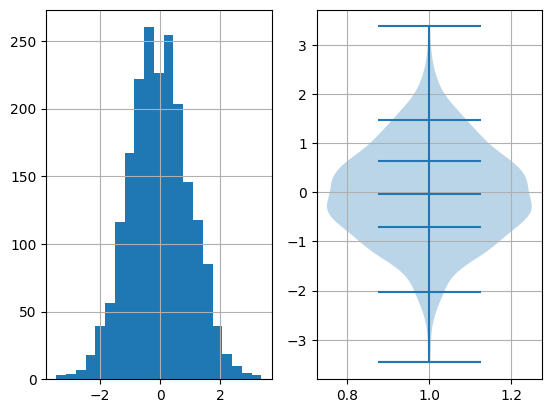

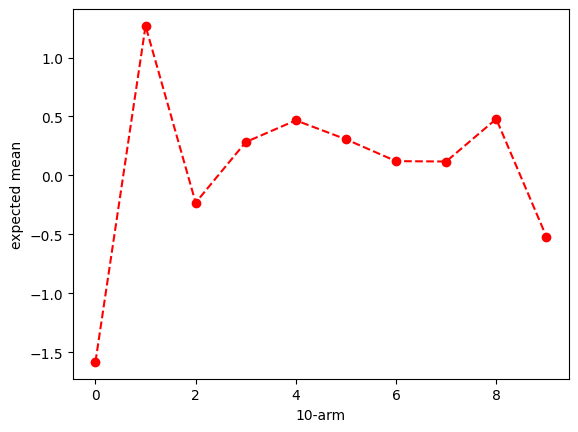

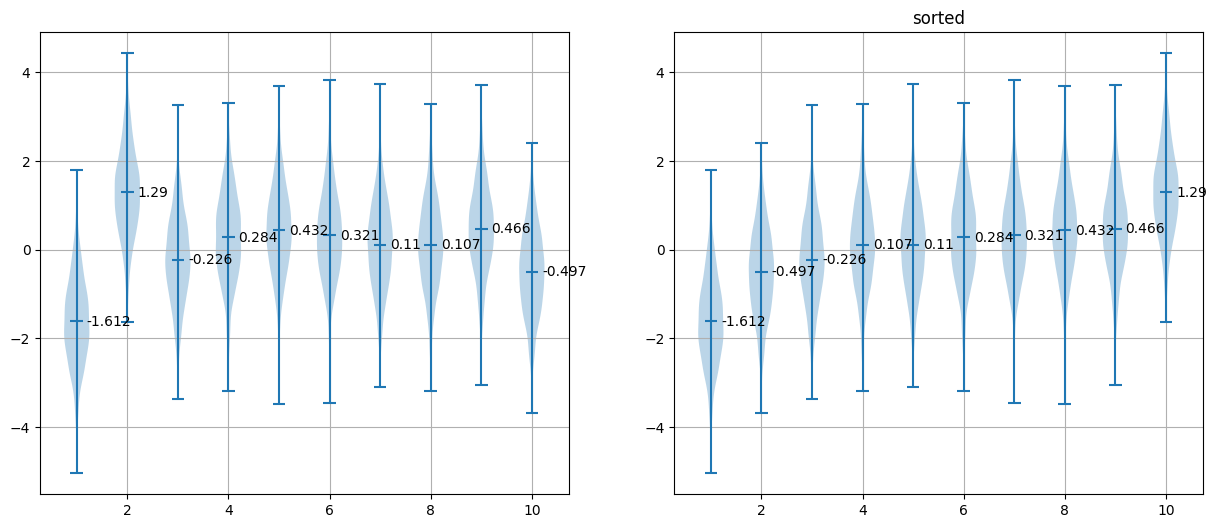

In [11]:
def draw_one_arm(reward_dist):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes[0]
    ax.grid()
    ax.hist(reward_dist, bins=21)

    ax = axes[1]
    ax.grid()
    ax.violinplot(
        reward_dist,
        showmeans=True,
        quantiles=[0, 0.025, 0.25, 0.75, 0.925]
    )

    return fig, axes


def draw_mu(reward_mu):
    fig, ax = plt.subplots()
    ax.plot(reward_mu, 'ro--')
    ax.set_xlabel(u"10-arm")
    ax.set_ylabel(u"expected mean")
    return fig, ax


def draw_k_arm(k_reward_dist_mu, k_reward_dist_mu_sort):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    ax = axes[0]
    ax.grid()
    ax.violinplot(k_reward_dist_mu, showmeans=True)
    mean = np.round(np.mean(k_reward_dist_mu, axis=0), 3)
    for i in range(10):
        ax.text(i + 1 + 0.2, mean[i] - 0.1, str(mean[i]))

    ax = axes[1]
    ax.grid()
    ax.violinplot(k_reward_dist_mu_sort, showmeans=True)
    mean = np.round(np.mean(k_reward_dist_mu_sort, axis=0), 3)
    for i in range(10):
        ax.text(i + 1 + 0.2, mean[i] - 0.1, str(mean[i]))

    ax.set_title('sorted')

    return fig, axes


if __name__ == "__main__":

    num_arm = 10
    num_data = 2000
    # random seed, type a int value to fix results, or it'll be random
    # np.random.seed(5)
    # random arm's distribution
    k_reward_dist = np.random.randn(num_data, num_arm)
    print("raw mean=", np.round(np.mean(k_reward_dist, axis=0), 3))
    fig1, _ = draw_one_arm(k_reward_dist[:, 0])
    # 10 arms' mu
    reward_mu = np.random.randn(num_arm)
    print("expected average return=", np.round(reward_mu, 3))
    fig2, _ = draw_mu(reward_mu)
    # 10 arms' distribution in violin
    k_reward_dist_mu = reward_mu + k_reward_dist
    print("actual mean=", np.round(np.mean(k_reward_dist_mu, axis=0), 3))
    # sort fig
    reward_mu_sort_arg = np.argsort(reward_mu)
    k_reward_dist_mu_sort = np.zeros_like(k_reward_dist_mu)
    for i in range(10):
        idx = reward_mu_sort_arg[i]  # i-th arm for idx
        k_reward_dist_mu_sort[:, i] = k_reward_dist_mu[:, idx]

    fig3, _ = draw_k_arm(k_reward_dist_mu, k_reward_dist_mu_sort)

    plt.show()